# Notebook E-tivity 3 CE4021 Task 1

Student name: Aurelie Montfrond

Student ID: 22289003

<hr style=\"border:2px solid gray\"> </hr>

## Imports

In [105]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt

 If you believe required imports are missing, please contact your moderator.

<hr style=\"border:2px solid gray\"> </hr>

## Task 1

You may add as many cells as you require to complete the task.

Option Dice: Rolling two 6-sided fair dice with the aim of determining the probability that the sum of the two dice is less than 3 or more than 10.

I will use a discrete random variable for the random variable and the uniform probability distribution for the probability distribution. I am choosing a discrete random variable because they are countable and finite such as a 6 sided die that has 6 sides each with a countable number 1,2,3,4,5,6. It is not an estimation of a value but indeed a concrete/final value unlike the continious random variable that is used for example within a normal distribution such as a population heights where the values are averages and not exact/finite values. If a person's height is for example 1.70m, it is not their exact height. They might be 1.6999999 m for example or 1.7000011289 m but their height is averaged to the nearest cm. So with a continious probability distribution , we are testing the probabily that values fall into a range of values and not be an exact value. 

Total outcomes when rolling two 6-sided dices : there are 36 single outcomes that the two dices can come up with and 
we can find this out by multiplying the total outcomes of the first die which would be 6 as there are six sides each 
numbered from 1 to 6 (1,2,3,4,5,6) with the total outcomes of the second die which would also be 6 as it's the same 6 
sided die as the first die. 
Total outcomes = 6*6 = 36

[1,1], [1,2], [1,3], [1,4], [1,5], [1,6]

[2,1], [2,2], [2,3], [2,4], [2,5], [2,6]

[3,1], [3,2], [3,3], [3,4], [3,5], [3,6]

[4,1], [4,2], [4,3], [4,4], [4,5], [4,6]

[5,1], [5,2], [5,3], [5,4], [5,5], [5,6]

[6,1], [6,2], [6,3], [6,4], [6,5], [6,6]

The total sum of the two dices is 12 so the probability that the sum of the two dices is more than 10 out of the 36 possible outcomes listed above is [5,6], [6,5], [6,6] . So 3/36 chances that the sum will be more than 10.

And the probability that the sum of the two dices is less than 3 is [1,1] . So 1/36 chance that the sum will be less than 3.







The expected value of the random variable is E(X) = x1 + xn/2
2+12/2 = 7
That is the mean/average value for the sum of the two dices that you would get when trying the experiment over a long period of time


The standard deviation formula for the sample in this case is :
<img src= "https://mikescalculators.com/wp-content/uploads/2021/05/sample-standard-deviation.png" />

We first need to calculate the mean which is (2+3+4+5+6+7+8+9+10+11+12)/11 = 77/11 = 7 which is the expected value/average as per the above cell.

Then we need to substract the mean from each value (so from 2 to 12) and square each result.

(2 - 7)2 = (-5)2 = 25, (3 - 7)2 = (-4)2 = 16, (4 - 7)2 = (-3)2 = 9, (5 - 7)2 = (-2)2 = 4, (6 - 7)2 = (-1)2 = 1 ,
(7 - 7)2 = (0)2 = 0, (8 - 7)2 = (1)2 = 1, (9 - 7)2 = (2)2 = 4, (10 - 7)2 = (3)2 = 9, (11 - 7)2 = (4)2 = 16 , 
(12 - 7)2 = (5)2 = 25 

We then need to add up all the results and divide by the total of all results -1 just like the total of all values at the beginning for N so 11-1 = 10. 25+16+9+4+1+0+1+4+9+16+25/10 = 110/10 = 11 and then we take the square root of that result 11 which is 3.316

The standard deviation for the random variable is 3.316


In [106]:
#Calculating the expected value(mean) and standard deviation of the dataset for the possible sums of two 6 sided dice
#using numpy

#Creating a numpy 1D array stored in the variable 'dataset' 
#containing all the possible sums values of two 6 sided dice
dataset = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

#Calculating the expected value(mean) with numpy
np.mean(dataset)

7.0

In [107]:
#Calculating the standard deviation with numpy.
#It is however calculating it using the population standard deviation formula so in this case it is best to calculate
#by hand as we need to use the sample standard deviation formula 
np.std(dataset)

3.1622776601683795

In [108]:
#However the sample standard deviation formula can be calculated in numpy by calculating the variance 
#and then taking its square root but it is only working with the added parameter ddof=1 .

variance = np.var(dataset, ddof=1)
sample = np.sqrt(variance)
print(sample)


3.3166247903554


In [109]:
#using the randint() function as part of the random() function to generate a random integer 
#between 1 and 6 for all the possible outcomes of each die
#Creating a function for each die

#function for the first die , rolling the first die and generating a random number between 1 and 6
def die1():
    return random.randint(1,6) #generates random number between 1 and 6
#looping through an arbritary range of die roll, in this case 10
for i in range(10):
#printing the result so 10 results for the 10 rolls
    print(die1())

#adding a space bewteen the functions
print()


#function for the second die , rolling the first die and generating a random number between 1 and 6   
def die2():
    return random.randint(1,6) #generates random number between 1 and 6
#looping through an arbritary range of die roll, in this case 10
for i in range(10):
#printing the result so 10 results for the 10 rolls
    print(die2())

#adding a space after the last function 
print()  

#looping through a range of die roll, in this case using the for loop on the two functions die1() and die2()
#to get their sums 10 times for the 10 rolls of both dice at the same time
for i in range(10): 
#adding the dice together to get the sum for each roll ,both functions are throwing their die at the same time again and
#adding them together to get the sum so the sum is different than the two functions alone for die() and die2().
    print(die1()+die2())
    

2
4
2
6
4
6
2
6
1
5

2
5
5
5
4
5
2
6
2
5

3
7
9
3
8
6
4
9
6
10


In [110]:
#Outcomes for each die for a number of die roll using a for loop.

#Creating a 1D array for all the possible outcomes of a 6 sided die 
outcomes = [ 1, 2, 3, 4, 5, 6]

#function for the first die 
def die1():
    return random.choice(outcomes) #generates random values from the 'outcomes' array.
#looping through a range of numbers up to 20 for 20 die rolls in this case
for i in range(20):
    print(die1())

#Adding a space between the functions
print()

#function for the first die 
def die2():
    return random.choice(outcomes) #generates random values from the 'outcomes' array.
#looping through a range of numbers up to 20 for 20 die rolls in this case
for i in range(20):
    print(die2())


4
4
5
6
5
3
6
3
2
1
1
3
3
5
2
2
2
5
5
5

3
6
1
2
2
1
1
4
5
1
3
2
5
5
6
4
2
3
5
5


In [111]:
#Outcome sums of two dice roll using a for loop.

#Creating a 1D array for all the possible outcomes for the sums of two 6-sided dice 
sums = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#function for the first die 
def Twodice():
    return random.choice(sums) #generates random values from the 'sums' array.
#looping through a range of numbers up to 20 for 20 dice rolls in this case
for i in range(20):
    print(Twodice())

 

12
10
11
12
6
9
7
8
7
7
5
6
7
3
12
2
4
5
11
4


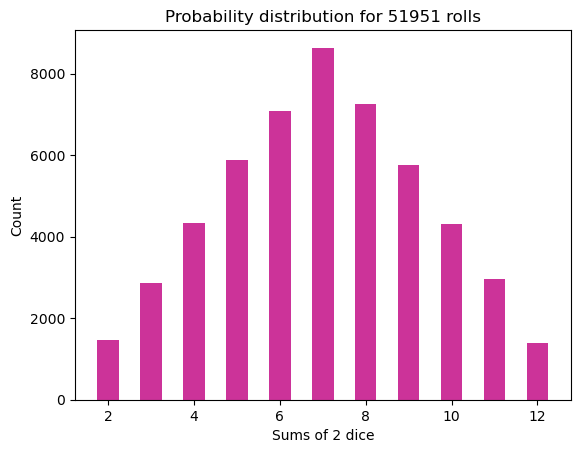

In [139]:
#Plotting the distribution with the number of bins corresponding to the number of values of the possible sums
#of the two dice

#Creating a N variable to store the number of rolls of the two dice at the same time
#that generates a random integer between two values each time the code is run
N = random.randint(1000,100000)
#Creating a die1 variable to store a random die throw for the first die
die1 = np.random.randint(low=1, high=7, size=N)
#Creating a die2 variable to store a random die throw for the second die
die2 = np.random.randint(low=1, high=7, size=N)
#Looping through the number of rolls of the two dice at the same time
for i in range(N): 
#Adding the two dice together to get the sum
    dice = die1 + die2
#Plotting the distribution with the number of bins per bars so 11 in total fitting properly with the corresponding values
#and the variable dice that contains all the possible sums from 2 to 12.
plt.hist(dice, bins=np.arange(2, 14), align="left", rwidth=0.5, color = "#cc3399")
plt.title("Probability distribution for "+ str(N) + " rolls")
plt.xlabel("Sums of 2 dice")
plt.ylabel("Count")

plt.show()
 

## Reflection

Write you reflection in below cell.